# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [3]:
from keras.utils import to_categorical
import numpy as np
np.random.seed(10)

In [4]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [7]:
x_train_image.shape

(60000, 28, 28)

In [8]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32') #28*28=784
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [9]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [13]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = to_categorical(y_train_label)
y_Test_OneHot = to_categorical(y_test_label)

# 建立模型

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
#建立模型
model = Sequential()

In [19]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [20]:
#建構輸出層
model.add(Dense(units=10, #要與分類目標一致為10筆
                kernel_initializer='normal', 
                activation='softmax'))

In [21]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               200960    
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335114 (1.28 MB)
Trainable params: 335114 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# 訓練模型

In [22]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [23]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Epoch 1/10


1500/1500 [==============================] - 8s 4ms/step - loss: 0.2374 - accuracy: 0.9281 - val_loss: 0.1182 - val_accuracy: 0.9632
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0977 - accuracy: 0.9696 - val_loss: 0.0960 - val_accuracy: 0.9722
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0694 - accuracy: 0.9778 - val_loss: 0.0868 - val_accuracy: 0.9745
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0540 - accuracy: 0.9828 - val_loss: 0.0972 - val_accuracy: 0.9722
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0436 - accuracy: 0.9862 - val_loss: 0.1316 - val_accuracy: 0.9663
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0388 - accuracy: 0.9883 - val_loss: 0.1077 - val_accuracy: 0.9724
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.1052 - val_accurac

# 以圖形顯示訓練過程

In [28]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

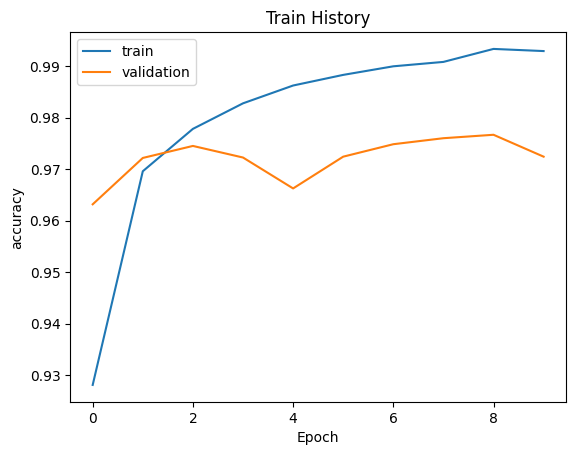

In [29]:
show_train_history(train_history,'accuracy','val_accuracy')

驗證集的的accuracy大約在0.97多就保持不動，而訓練集則是不斷上升

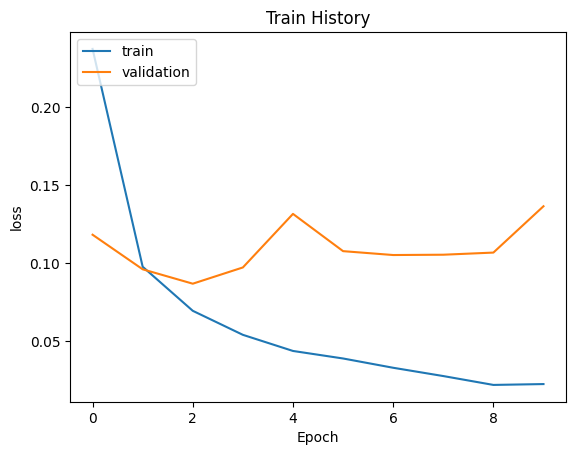

In [31]:
show_train_history(train_history,'loss','val_loss')

loss在訓練時是持續下降的，在驗證時還有上升的趨勢，模型沒有再進行優化

# 評估模型準確率

In [32]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1085 - accuracy: 0.9765

accuracy= 0.9764999747276306
